In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from yellowbrick.features import PCA as YBPCA
from kneed import KneeLocator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
#import plotly.express as px

In [2]:
bike_winter = pd.read_csv("bike_winter.csv")
bike_winter.head()

,Unnamed: 0,datetime,date,hour,season,holiday,open,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall
0,1,2017-12-01 00:00:00,2017-12-01,0,Winter,No Holiday,Yes,254,-5.2,37,2.2,20000,-17.6,0.0,0.0,0
1,2,2017-12-01 01:00:00,2017-12-01,1,Winter,No Holiday,Yes,204,-5.5,38,0.8,20000,-17.6,0.0,0.0,0
2,3,2017-12-01 02:00:00,2017-12-01,2,Winter,No Holiday,Yes,173,-6.0,39,1.0,20000,-17.7,0.0,0.0,0
3,4,2017-12-01 03:00:00,2017-12-01,3,Winter,No Holiday,Yes,107,-6.2,40,0.9,20000,-17.6,0.0,0.0,0
4,5,2017-12-01 04:00:00,2017-12-01,4,Winter,No Holiday,Yes,78,-6.0,36,2.3,20000,-18.6,0.0,0.0,0


In [3]:
bike_winter_col = list(bike_winter.columns)
bike_winter_numeric_col = list(bike_winter.describe().columns)
diff_names = []
for i in bike_winter_col:
	if i not in bike_winter_numeric_col:
		diff_names.append(i)
diff_names

['datetime', 'date', 'season', 'holiday', 'open']

In [35]:
bike_winter2 = bike_winter.copy()
bike_winter2.drop(columns = diff_names,inplace=True)
#bike_winter2.drop(columns = ['rent_count'], inplace = True)
bike_winter2.drop(columns = ['rent_count', 'dewpoint_temp'], inplace = True)
bike_winter2.head()

,Unnamed: 0,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall
0,1,0,-5.2,37,2.2,20000,0.0,0.0,0
1,2,1,-5.5,38,0.8,20000,0.0,0.0,0
2,3,2,-6.0,39,1.0,20000,0.0,0.0,0
3,4,3,-6.2,40,0.9,20000,0.0,0.0,0
4,5,4,-6.0,36,2.3,20000,0.0,0.0,0


In [36]:
bike_winter3 = bike_winter2.iloc[: , 1:]
bike_winter3.head()

,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall
0,0,-5.2,37,2.2,20000,0.0,0.0,0
1,1,-5.5,38,0.8,20000,0.0,0.0,0
2,2,-6.0,39,1.0,20000,0.0,0.0,0
3,3,-6.2,40,0.9,20000,0.0,0.0,0
4,4,-6.0,36,2.3,20000,0.0,0.0,0


In [37]:
bike_winter3.describe()

,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,11.500000,-2.540463,49.744907,1.922685,14459.870370,0.298181,0.032824,2.475000
std,6.923789,5.469763,19.303054,1.156028,6348.564457,0.523243,0.422526,6.983692
min,0.000000,-17.800000,14.000000,0.000000,540.000000,0.000000,0.000000,0.000000
25%,5.750000,-6.200000,34.000000,1.000000,9537.500000,0.000000,0.000000,0.000000
50%,11.500000,-2.200000,47.000000,1.700000,17620.000000,0.000000,0.000000,0.000000
75%,17.250000,1.500000,63.000000,2.700000,19980.000000,0.452500,0.000000,0.000000
max,23.000000,10.300000,97.000000,6.700000,20000.000000,2.520000,9.500000,51.000000


In [38]:
_ , p_value = calculate_bartlett_sphericity(bike_winter3)
p_value

0.0

In [39]:
_, kmo_score = calculate_kmo(bike_winter3)
kmo_score 

0.5693304013173582

In [40]:
colnames = list(bike_winter3.columns)

scaler = StandardScaler(with_mean=True,with_std=True)
scaled_features = pd.DataFrame(scaler.fit_transform(bike_winter3))

scaled_features.columns = colnames

In [41]:
corr = scaled_features.corr()
corr

,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall
hour,1.000000,0.220823,-0.192557,0.204463,0.050296,0.134496,0.020527,-0.055960
temperature,0.220823,1.000000,0.226316,-0.125166,-0.552616,0.189294,0.066779,-0.057513
humidity,-0.192557,0.226316,1.000000,-0.349294,-0.749572,-0.464243,0.163973,0.328238
wind_speed,0.204463,-0.125166,-0.349294,1.000000,0.296282,0.364400,-0.010278,-0.057215
visibility,0.050296,-0.552616,-0.749572,0.296282,1.000000,0.165397,-0.113759,-0.204558
solar_radiation,0.134496,0.189294,-0.464243,0.364400,0.165397,1.000000,-0.040979,-0.072475
rainfall,0.020527,0.066779,0.163973,-0.010278,-0.113759,-0.040979,1.000000,0.062319
snowfall,-0.055960,-0.057513,0.328238,-0.057215,-0.204558,-0.072475,0.062319,1.000000


<AxesSubplot:>

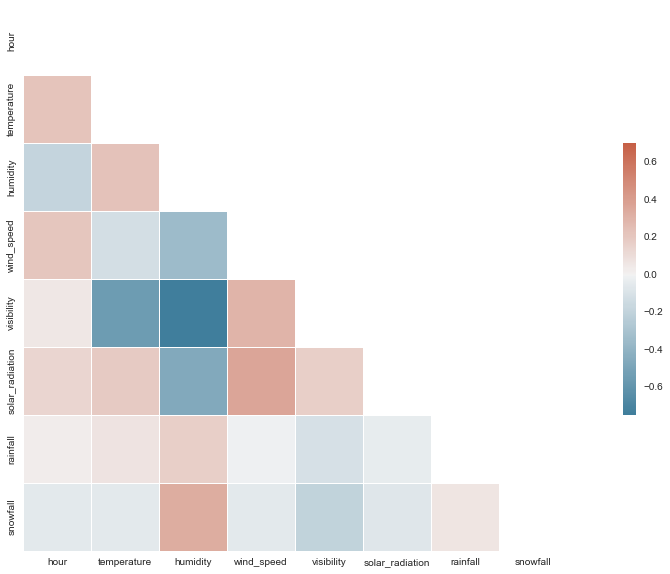

In [42]:
plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap,vmax =0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
#We will set n_components to 10

N = 8
pca = PCA(n_components=N)
pca.fit(scaled_features)

PCA(n_components=8)

In [45]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


array([0.31219139, 0.18987981, 0.13183238, 0.11830367, 0.10701505,
       0.08113904, 0.04097706, 0.0186616 ])

In [46]:
cumulative_variance = np.cumsum(np.round(explained_variance_ratio, decimals=3))
cumulative_variance

array([0.312, 0.502, 0.634, 0.752, 0.859, 0.94 , 0.981, 1.   ])

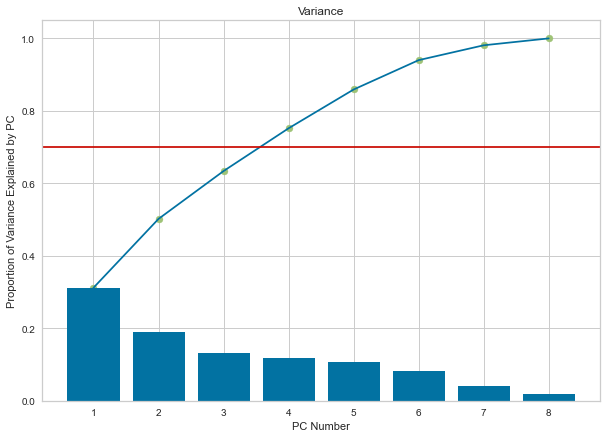

In [47]:
x = list(range(1,N+1))
plt.figure(figsize=(10, 7)) 
plt.bar(x,explained_variance_ratio)
plt.scatter(range(1,N+1),cumulative_variance)
plt.plot(x,cumulative_variance)
plt.title('Variance')
plt.xlabel('PC Number')
plt.ylabel('Proportion of Variance Explained by PC')
plt.axhline(y=0.7, color = 'r')

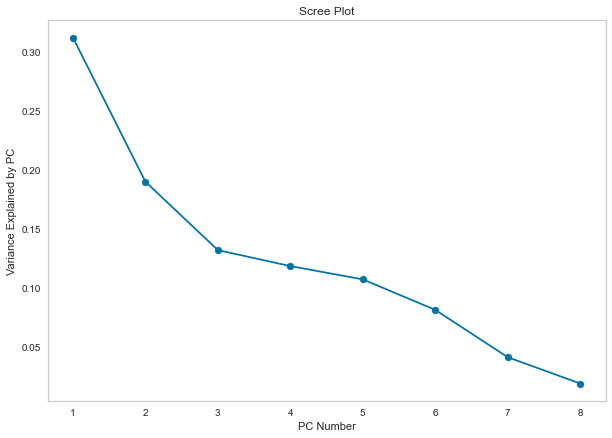

In [48]:
plt.figure(figsize=(10, 7)) 
plt.scatter(range(1,N+1),pca.explained_variance_ratio_)
plt.plot(range(1,N+1),pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('PC Number')
plt.ylabel('Variance Explained by PC')
plt.grid()

In [49]:
kl = KneeLocator(range(1, N+1), pca.explained_variance_ratio_, curve="convex", direction="decreasing")

kl.elbow

3

In [50]:
# factor analysis
def evaluate_pcs(num_of_pcs,data):
    def encode_vals(x): #helper functions to suppress loading less than 0.7 
    #a gradual process to lead to this function
    # if x<=-0.5, we drop the variable
        if x <= -0.5 or x >= 0.5: #Adjust the threshold value 
            return x
        else:
            return("")    
    f = FactorAnalyzer(n_factors=num_of_pcs, method = 'principal',rotation='varimax') #Conduct PCA + varimax rotation to extract latent factors 
    f.fit(data)
    loadings = pd.DataFrame(f.loadings_).set_index(data.columns)
    loadings = loadings.applymap(encode_vals)
    loadingcols= list(loadings.columns)
    newcols = {}
    for i in loadingcols:
        newcols[i] = "PC" + str(i+1)
    loadings.rename(columns = newcols,inplace=True)
    return loadings



In [51]:
def CronbachAlpha(itemscores): #calculate the CronbachAlpha to see how closely related a set of items are as a group
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [52]:
evaluate_pcs(3,scaled_features[colnames])

,PC1,PC2,PC3
hour,,0.599996,
temperature,0.857629,,
humidity,0.592746,-0.546991,
wind_speed,,0.650896,
visibility,-0.856294,,
solar_radiation,,0.756149,
rainfall,,,0.598578
snowfall,,,0.766129


In [53]:
print(CronbachAlpha(scaled_features[['temperature','humidity']]))
print(CronbachAlpha(scaled_features[['hour','wind_speed','solar_radiation']]))
print(CronbachAlpha(scaled_features[['rainfall','snowfall']]))

0.3690988344825732
0.4788320648958179
0.11732717614778476
